In [1]:
# Special THanks to 
# https://stackoverflow.com/questions/49308530/missing-values-in-time-series-in-python

In [2]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

%matplotlib inline

# from jupyter_core.paths import jupyter_data_dir
# print(jupyter_data_dir())

In [3]:
# df=pd.read_csv('SampleData2.CSV', index_col='Date')

local_path = 'SampleData.CSV'
remote_path = "https://raw.githubusercontent.com/drnesr/"\
              "WaterConsumption/master/SampleData.csv"
df=pd.read_csv(remote_path)
df.head()

,Date,reference,target
0,15-01-2010,12.0,12.0
1,15-02-2010,18.0,18.0
2,15-03-2010,22.0,22.0
3,15-04-2010,26.0,26.0
4,15-05-2010,31.0,NaN


In [4]:
# Converting the column to DateTime format
df.Date = pd.to_datetime(df.Date, format='%d-%m-%Y')
df = df.set_index('Date')
df.head()

,reference,target
Date,,
2010-01-15,12.0,12.0
2010-02-15,18.0,18.0
2010-03-15,22.0,22.0
2010-04-15,26.0,26.0
2010-05-15,31.0,NaN


In [5]:
# add a column that its default value is np.nan

df = df.assign(missing= np.nan)
df.missing[df.target.isna()] = df.reference
# df.missing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-15 to 2017-12-15
Data columns (total 3 columns):
reference    96 non-null float64
target       75 non-null float64
missing      21 non-null float64
dtypes: float64(3)
memory usage: 3.0 KB


***Column M has a lot of missing values***

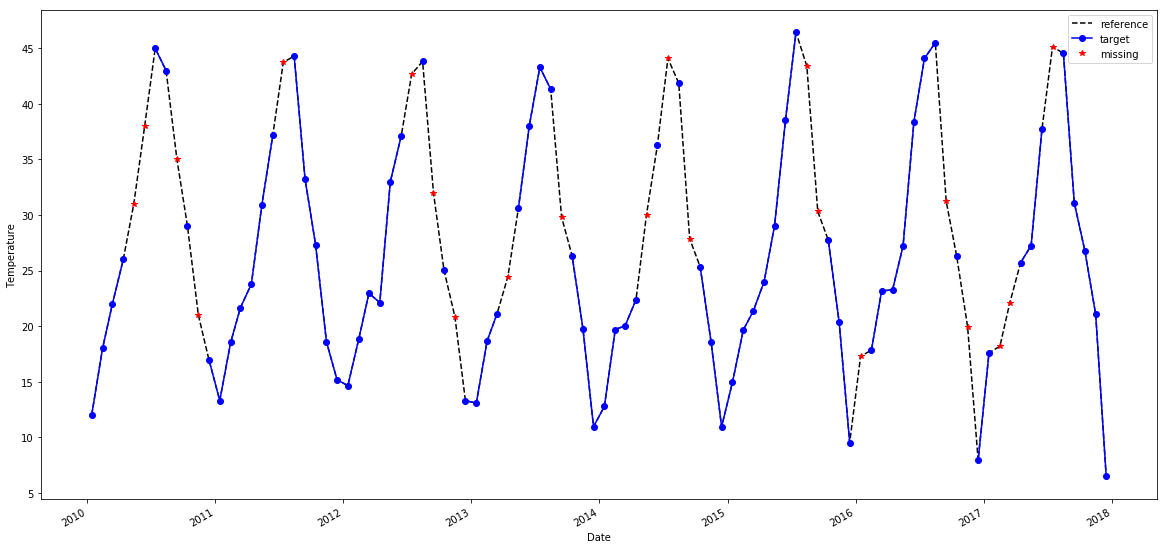

In [7]:
# plt.figure(figsize=(20,10))
# styles=['r-*', 'bs-', 'ro-', 'y^-']
styles=['k--', 'bo-', 'r*', 'y^-']
df.plot(style=styles, figsize=(20,10));
plt.ylabel('Temperature');
# df.plot()

In [8]:
# Filling using mean or median
df = df.assign(FillMean=df.target.fillna(df.target.mean()))
df = df.assign(FillMedian=df.target.fillna(df.target.median()))

In [9]:
# Creating a column in the dataframe
# instead of : df['NewCol']=0, we use
df = df.assign(RollingMean=0) # To avoid pandas warning
df = df.assign(RollingMedian=0) 

In [18]:
# imputing using rolling average
# df['Rolling'] = df.rolling(12).mean()['M']
df.RollingMean=df.target.fillna(df.target.
                                rolling(24,min_periods=1,).mean())
df.RollingMedian=df.target.fillna(df.target.
                                  rolling(24,min_periods=1,).median())

In [11]:
df[df.target.isna()]

,reference,target,missing,FillMean,FillMedian,RollingMean,RollingMedian
Date,,,,,,,
2010-05-15,31.000000,NaN,31.000000,25.887473,23.787254,NaN,NaN
2010-06-15,38.000000,NaN,38.000000,25.887473,23.787254,NaN,NaN
2010-09-15,35.000000,NaN,35.000000,25.887473,23.787254,NaN,NaN
2010-11-15,21.000000,NaN,21.000000,25.887473,23.787254,NaN,NaN
2011-07-15,43.736826,NaN,43.736826,25.887473,23.787254,25.526367,22.893627
2012-07-15,42.700259,NaN,42.700259,25.887473,23.787254,26.085959,23.370991
2012-09-15,31.983634,NaN,31.983634,25.887473,23.787254,26.126719,23.370991
2012-11-15,20.864568,NaN,20.864568,25.887473,23.787254,25.927993,23.370991
2013-04-15,24.459104,NaN,24.459104,25.887473,23.787254,25.812261,22.954727


In [13]:
# In one step
df = df.assign(InterpolateLinear=df.target.interpolate(method='linear'))
df = df.assign(InterpolateTime=df.target.interpolate(method='time'))
df = df.assign(InterpolateQuadratic=df.target.interpolate(method='quadratic'))
df = df.assign(InterpolateCubic=df.target.interpolate(method='cubic'))
df = df.assign(InterpolateSLinear=df.target.interpolate(method='slinear'))
df = df.assign(InterpolateAkima=df.target.interpolate(method='akima'))
df = df.assign(InterpolatePoly5=df.target.interpolate(method='polynomial', order=5)) 
df = df.assign(InterpolatePoly7=df.target.interpolate(method='polynomial', order=7))
df = df.assign(InterpolateSpline3=df.target.interpolate(method='spline', order=3))
df = df.assign(InterpolateSpline4=df.target.interpolate(method='spline', order=4))
df = df.assign(InterpolateSpline5=df.target.interpolate(method='spline', order=5))
df[df.target.isna()].sample(5)

,reference,target,missing,FillMean,FillMedian,RollingMean,RollingMedian,InterpolateLinear,InterpolateTime,InterpolateQuadratic,InterpolateCubic,InterpolateSLinear,InterpolateAkima,InterpolatePoly5,InterpolatePoly7,InterpolateSpline3,InterpolateSpline4,InterpolateSpline5
Date,,,,,,,,,,,,,,,,,,
2017-02-15,18.193831,NaN,18.193831,25.887473,23.787254,27.126524,25.131121,20.308415,20.398560,24.146204,24.533420,20.398560,9.778963e+10,26.886143,27.434183,22.260423,31.226651,26.069525
2016-01-15,17.279490,NaN,17.279490,25.887473,23.787254,24.818279,21.854651,13.688738,13.688738,10.236140,9.871947,13.688738,-5.286098e+12,8.787735,8.532037,10.124140,12.683222,11.126161
2010-05-15,31.000000,NaN,31.000000,25.887473,23.787254,NaN,NaN,32.333333,32.263736,32.500323,32.891644,32.263736,5.560619e+12,32.530273,32.278793,33.432723,34.904181,34.330338
2016-11-15,19.950309,NaN,19.950309,25.887473,23.787254,26.753424,23.989000,17.107874,16.957622,12.801090,12.347818,16.957622,-1.199158e+12,11.365876,10.975808,12.977792,14.113596,11.599386
2010-09-15,35.000000,NaN,35.000000,25.887473,23.787254,NaN,NaN,36.000000,35.885246,36.560360,36.469407,35.885246,-1.665364e+12,36.030602,35.601642,38.468729,37.044460,37.529701


In [12]:
# # Creating a column in the dataframe
# # instead of : df['NewCol']=0, we use
# df = df.assign(InterpolateLinear=df.target) # To avvoid pandas warning
# df = df.assign(InterpolateTime=df.target) # To avvoid pandas warning
# df = df.assign(InterpolateQuadratic=df.target) # To avvoid pandas warning
# df = df.assign(InterpolateCubic=df.target) # To avvoid pandas warning
# df = df.assign(InterpolateSLinear=df.target) # To avvoid pandas warning
# df = df.assign(InterpolateAkima=df.target) # To avvoid pandas warning
# df = df.assign(InterpolatePoly5=df.target) # To avvoid pandas warning 
# df = df.assign(InterpolatePoly7=df.target) # To avvoid pandas warning
# df = df.assign(InterpolateSpline3=df.target) # To avvoid pandas warning
# df = df.assign(InterpolateSpline4=df.target) # To avvoid pandas warning
# df = df.assign(InterpolateSpline5=df.target) # To avvoid pandas warning

# Linear interpolation
# df.InterpolateLinear.interpolate(method='linear', inplace=True)


# Time interpolation
# df.InterpolateTime.interpolate(method='time', inplace=True)


# Cubic interpolation
# df.InterpolateCubic.interpolate(method='cubic', inplace=True)


# Quadratic interpolation
# df.InterpolateQuadratic.interpolate(method='quadratic', inplace=True)


# SLinear interpolation
# df.InterpolateSLinear.interpolate(method='slinear', inplace=True)
# df[df.target.isna()].sample(5)

# Akima interpolation
# df.InterpolateAkima.interpolate(method='akima', inplace=True)


# Poly5 interpolation
# df.InterpolatePoly5.interpolate(method='polynomial', order=5, inplace=True)


# Poly7 interpolation
# df.InterpolatePoly7.interpolate(method='polynomial', order=7, inplace=True)


# Spline3 interpolation
# df.InterpolateSpline3.interpolate(method='spline', order=3, inplace=True)


# Spline4 interpolation
# df.InterpolateSpline4.interpolate(method='spline', order=4, inplace=True)


# Spline5 interpolation
# df.InterpolateSpline5.interpolate(method='spline', order=5, inplace=True)


# df[df.target.isna()].sample(5)

In [15]:
df.RollingMean.corr(df.InterpolateLinear)

0.906984729897184

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-15 to 2017-12-15
Data columns (total 18 columns):
reference               96 non-null float64
target                  75 non-null float64
missing                 21 non-null float64
FillMean                96 non-null float64
FillMedian              96 non-null float64
RollingMean             96 non-null float64
RollingMedian           96 non-null float64
InterpolateLinear       96 non-null float64
InterpolateTime         96 non-null float64
InterpolateQuadratic    96 non-null float64
InterpolateCubic        96 non-null float64
InterpolateSLinear      96 non-null float64
InterpolateAkima        96 non-null float64
InterpolatePoly5        96 non-null float64
InterpolatePoly7        96 non-null float64
InterpolateSpline3      96 non-null float64
InterpolateSpline4      96 non-null float64
InterpolateSpline5      96 non-null float64
dtypes: float64(18)
memory usage: 14.2 KB


In [20]:
r2_score(df.RollingMean, df.reference)

0.6847407706545179

In [21]:
results = [(method, r2_score(df.reference, df[method])) for method in list(df)[3:]]
results_df = pd.DataFrame(np.array(results), columns=['Method', 'R_squared'])
results_df.sort_values(by='R_squared', ascending=False)

,Method,R_squared
5,InterpolateTime,0.9815664478940275
8,InterpolateSLinear,0.9815664478940275
4,InterpolateLinear,0.9813215759943529
6,InterpolateQuadratic,0.9663474396797
12,InterpolateSpline3,0.9633836918698976
7,InterpolateCubic,0.9633218181089737
10,InterpolatePoly5,0.954157955951024
14,InterpolateSpline5,0.951671359314308
11,InterpolatePoly7,0.9504371542313383
13,InterpolateSpline4,0.928463604189156


In [29]:
final_df= df[['reference', 'target', 'missing', 'FillMean', 'InterpolateTime' ]]
final_df.head()

,reference,target,missing,FillMean,InterpolateTime
Date,,,,,
2010-01-15,12.0,12.0,NaN,12.000000,12.000000
2010-02-15,18.0,18.0,NaN,18.000000,18.000000
2010-03-15,22.0,22.0,NaN,22.000000,22.000000
2010-04-15,26.0,26.0,NaN,26.000000,26.000000
2010-05-15,31.0,NaN,31.0,25.887473,32.263736


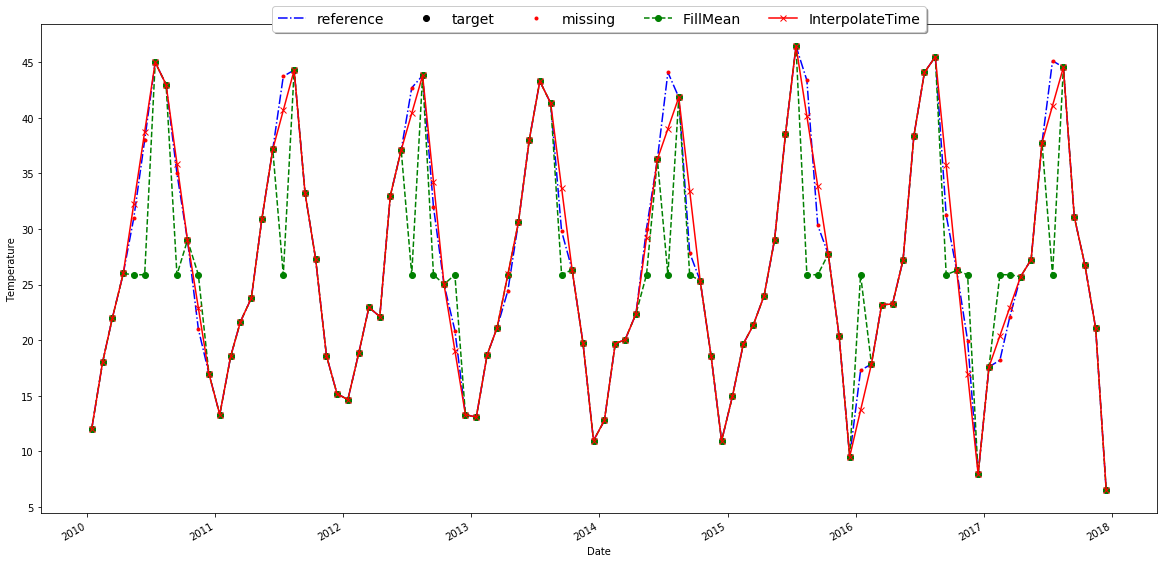

In [39]:
styles=['b-.', 'ko', 'r.','go--', 'rx-']#'k--', 'bo-', 'r*', 'y^-'
final_df.plot(style=styles, figsize=(20,10));
plt.ylabel('Temperature');
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          fancybox=True, shadow=True, ncol=5, prop={'size': 14} );